**In this project, I explored the insurance dataset, in which I converted categorical values to numerical values using an encoder and plotted a heatmap to see the dependency of dependent values on independent features. I visualised all feature plots, plotted skew and kurtosis for these parameters, and created four prediction models, i.e., linear regression, SVR, ridge regression, and random forest regression. Based on the results, I plotted graphs for all models to compare performance.**

**Project by Sumit Sonar ✈**

# ***`Exploratory Data Analysis:`***

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
categorical_cols = df.select_dtypes(include='object').columns
print(df[categorical_cols])

         sex smoker     region
0     female    yes  southwest
1       male     no  southeast
2       male     no  southeast
3       male     no  northwest
4       male     no  northwest
...      ...    ...        ...
1333    male     no  northwest
1334  female     no  northeast
1335  female     no  southeast
1336  female     no  southwest
1337  female    yes  northwest

[1338 rows x 3 columns]


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
!pip install seaborn==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


<Axes: >

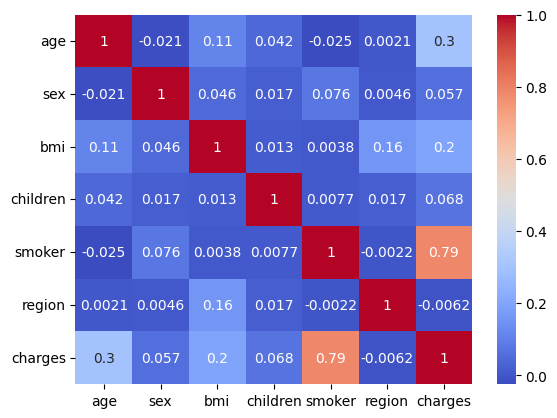

In [11]:
import seaborn as sns

# Calculate the correlation matrix
corr = df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

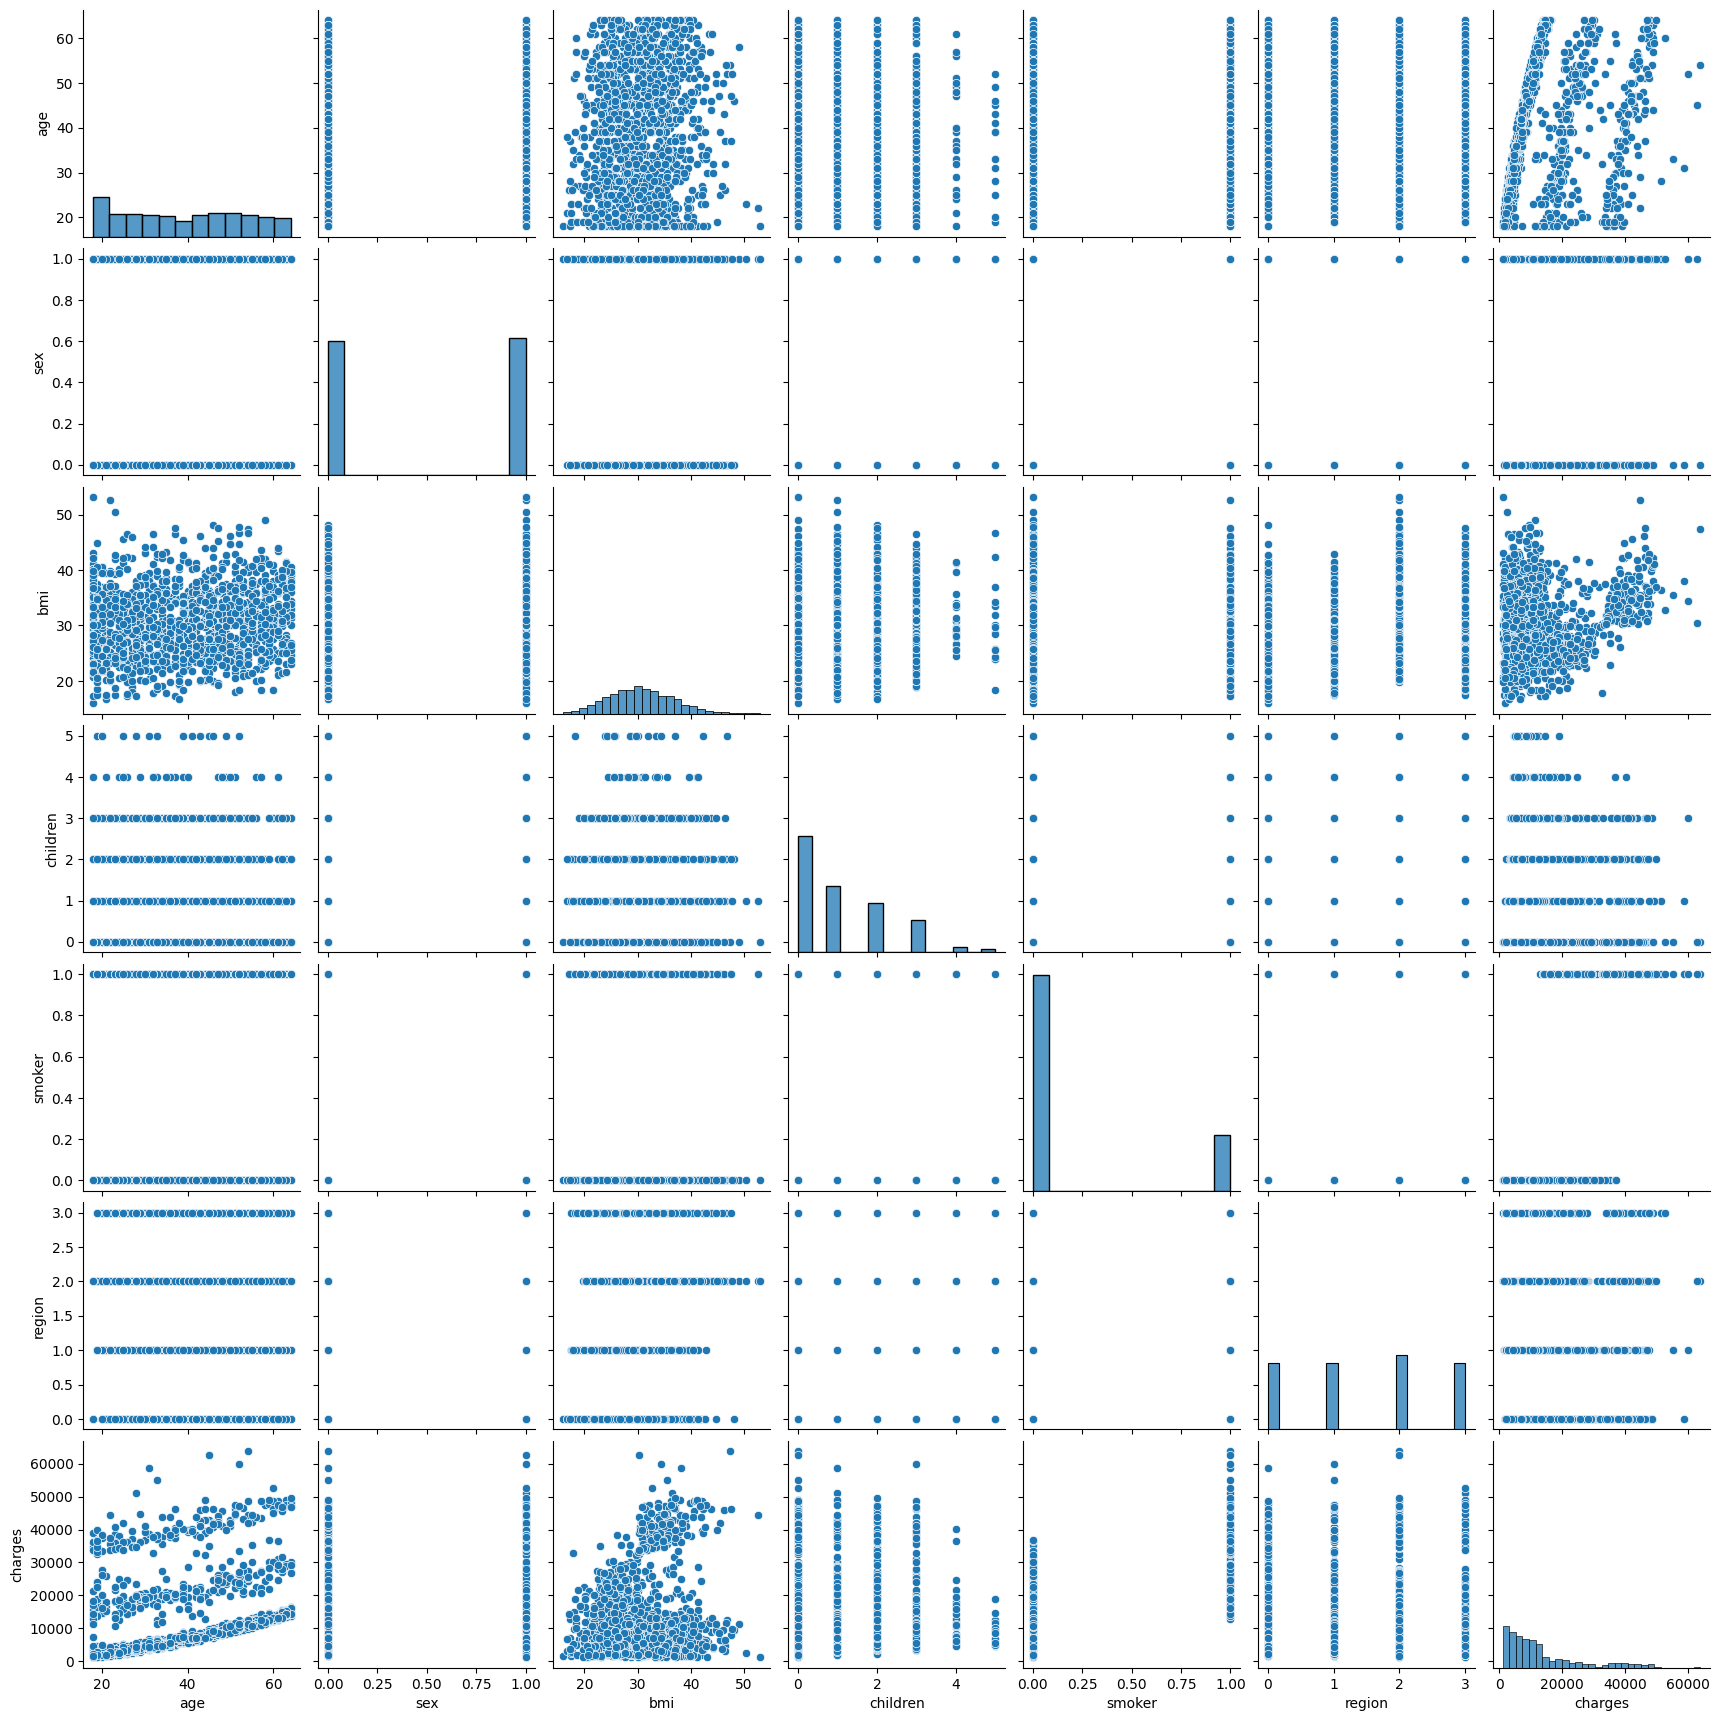

In [12]:
sns.pairplot(df)

In [13]:
skewness = df.skew()
kurtosis = df.kurtosis()

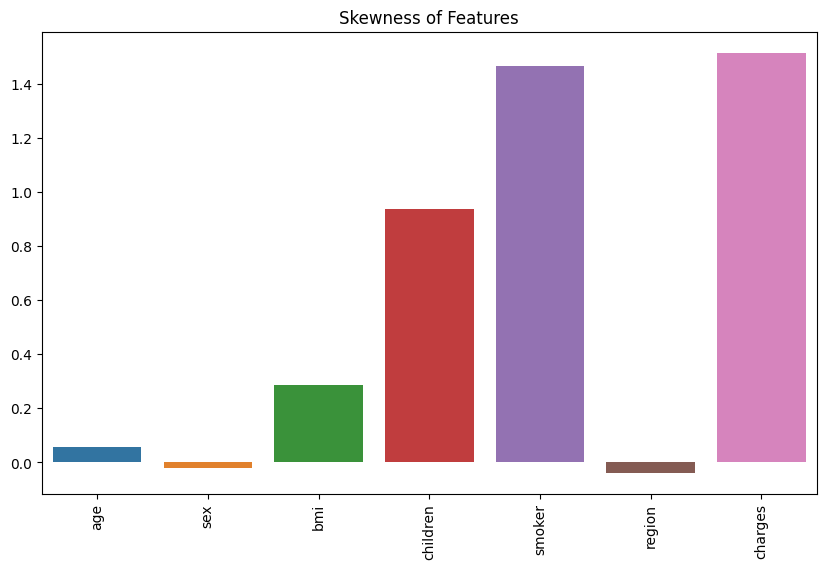

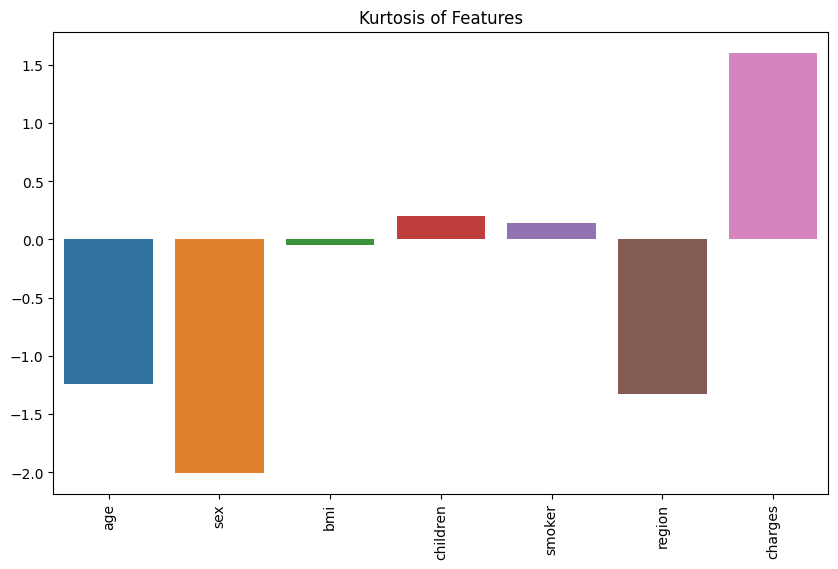

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness.values)
plt.xticks(rotation=90)
plt.title('Skewness of Features')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=kurtosis.index, y=kurtosis.values)
plt.xticks(rotation=90)
plt.title('Kurtosis of Features')
plt.show()

# **Model training part starts from here ↪**

In [23]:
# USING LINEAR REGRESSION

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target variable
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}')

MAE: 4186.508898366433, MSE: 33635210.431178406, RMSE: 5799.587091438356, R2: 0.7833463107364539


In [20]:
# USING SVR

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# Train the SVR model

from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

SVR()

In [22]:
# Make predictions and evaluate the model

y_pred_svr = svr_model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'MAE: {mae_svr}, MSE: {mse_svr}, RMSE: {rmse_svr}, R2: {r2_svr}')

MAE: 8599.328962388287, MSE: 165839509.92452022, RMSE: 12877.868997800848, R2: -0.06821813183902203


In [26]:
# USING RIDGE REGRESSOR

from sklearn.linear_model import Ridge

# Initialize and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'MAE: {mae_ridge}, MSE: {mse_ridge}, RMSE: {rmse_ridge}, R2: {r2_ridge}')

MAE: 4198.1410053217305, MSE: 33675792.15420229, RMSE: 5803.084710238365, R2: 0.78308491263913


In [27]:
# USING RANDOM FOREST REGRESSOR

from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)

rf_mae, rf_mse, rf_rmse, rf_r2
print(f'MAE: {rf_mae}, MSE: {rf_mse}, RMSE: {rf_rmse}, R2: {rf_r2}')

MAE: 2533.674643617756, MSE: 21073365.415079337, RMSE: 4590.5735387944, R2: 0.8642606273649586


# **Plotting Graph for all Models to compare performance**

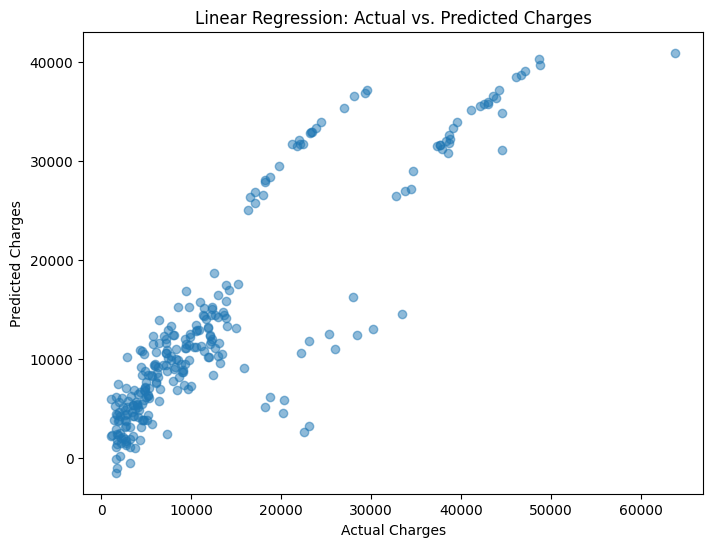

In [38]:
# Linear Regression Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Linear Regression: Actual vs. Predicted Charges")
plt.show()


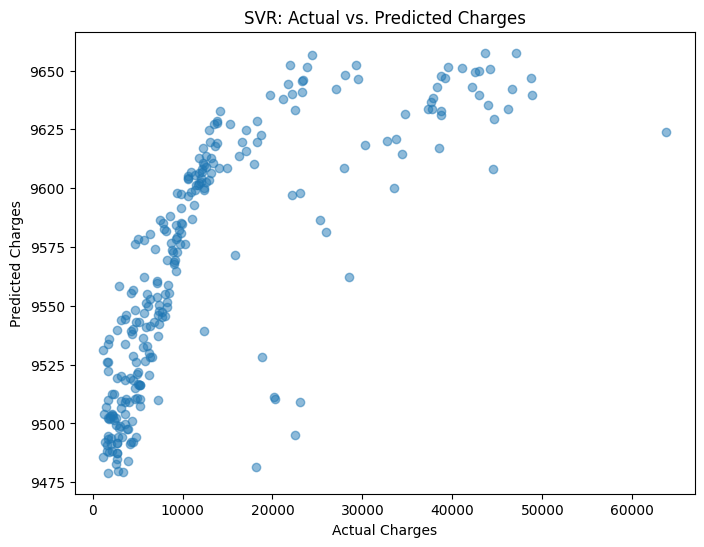

In [31]:
# SVR Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("SVR: Actual vs. Predicted Charges")
plt.show()

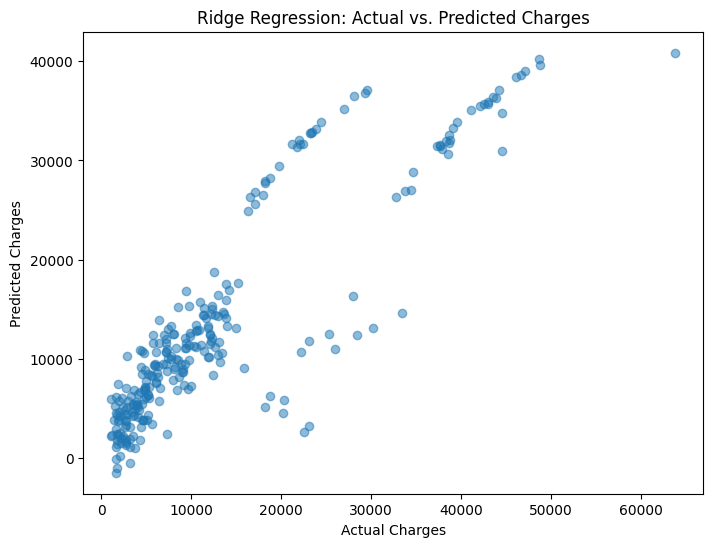

In [32]:
# Ridge Regression Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Ridge Regression: Actual vs. Predicted Charges")
plt.show()

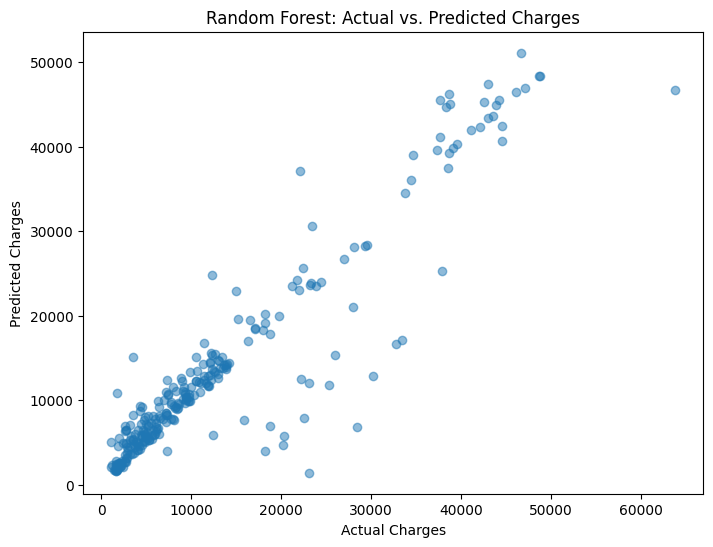

In [33]:
# Random Forest Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_rf_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Random Forest: Actual vs. Predicted Charges")
plt.show()